# Logistic Regression
I'm using some data I found in geeksforgeeks

In [ ]:
#Install any packages you need
! pip install pandas
! pip install matplotlib
! pip install statsmodels
! pip install numpy

Format and setup the data for easier manipulation

In [4]:
import pandas as pd

data = pd.read_csv('Data.csv')
#These are the values most likely to change
independents = ['gmat', 'gpa', 'work experience']
dependent = 'admitted'

for i in data.columns:
    data[i] = pd.to_numeric(data[i], errors='coerce')
data = data.dropna()
data.head()

,gmat,gpa,work experience,admitted
0,580,2.7,4,0
1,660,3.3,6,1
2,740,3.3,5,1
3,590,1.7,4,0
4,660,4.0,4,1


Plotting the distribution for the first independent variable just for visualisation

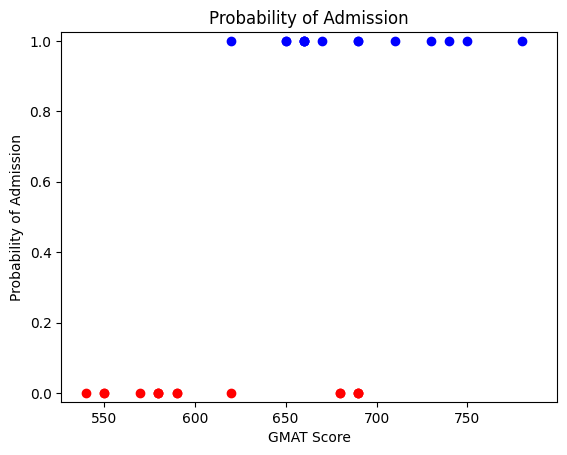

In [32]:
from matplotlib import pyplot as plt

def plotting(x):
    #These are the values most likely to change
    plt.title("Probability of Admission")
    plt.xlabel("GMAT Score")
    plt.ylabel("Probability of Admission")

    plt.xlim(min(x)*0.975, max(x)*1.025)
    plt.ylim(-0.025, 1.025)

def testingScatters(testingIndependent):
    dependentFalse = data[data[dependent] == 0]
    dependentTrue = data[data[dependent] == 1]

    plt.scatter(dependentFalse[testingIndependent], dependentFalse[dependent], color='red')
    plt.scatter(dependentTrue[testingIndependent], dependentTrue[dependent], color='blue')

testingScatters(independents[0])
plotting(data[independents[0]])

Generating the Logistic Regression model

In [29]:
import statsmodels.api as sm

testingModel = sm.Logit(data[dependent], sm.add_constant(data[independents[0]])).fit()

model = sm.Logit(data[dependent], sm.add_constant(data[independents])).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.474922
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.247296
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Feb 2024   Pseudo R-squ.:                  0.6432
Time:                        20:26:34   Log-Likelihood:                -7.4189
converged:                       True   LL-Null:                       -20.794
Covariance Type:            nonrobust   LLR p-value:                 6.639e-06
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -16.3315      8.601     -1.899      0.058     -33.189       0.526
gmat                0.0025      0.018      0.141      0.888      -0.032       0.037
gpa                 3.3208      2.397      1.385      0.166      -1.378       8.020
work experience     0.9975      0.585      1.704      0.088      -0.150       2.145
===================================================================================
"""

Plotting the model towards first independent variable for visualisation

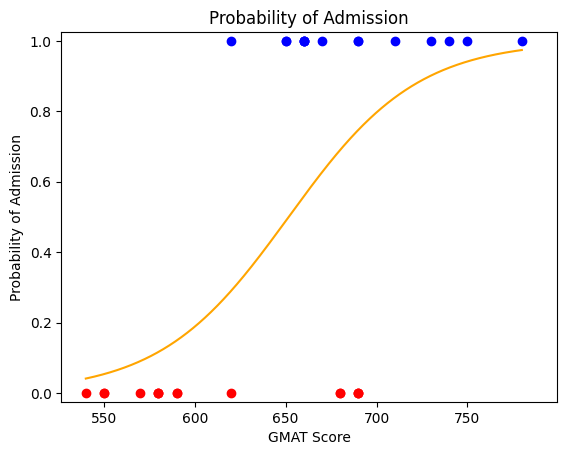

In [35]:
import numpy as np

visualisationValues = np.arange(min(data[independents[0]]), max(data[independents[0]]), 0.01)
prediction = testingModel.predict(sm.add_constant(visualisationValues))

plt.plot(visualisationValues, prediction, color='orange')

testingScatters(independents[0])
plotting(data[independents[0]])

Creating a table for our custom inputs

In [72]:
predictionValues = [[400, 4, 4],
                    [600, 3, 5]]
predictionFrame = pd.DataFrame()

for i, v in enumerate(predictionValues[0]):
    predictionFrame[independents[i]] = [x[i] for x in predictionValues]

prediction = model.predict(sm.add_constant(predictionFrame))
predictionFrame[f"Predicted {dependent} probability"] = prediction
predictionFrame

,gmat,gpa,work experience,Predicted admitted probability
0,400,4,4,0.874679
1,600,3,5,0.530073
